# Multivariate Polynomial Regression Optimization

Used for plugging in synthetic optimization dataset to find the optimal value for parameters

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy
import math

### Function Definitions

Returns the Linear Regression Equation for the model in a readable format

In [2]:
def getEq(weights, cols, intercept):
    return ('Formula: y =  {} + {}({}) + {}({}) + {}({}) + {}({})'.format(intercept, weights[0], cols[0], weights[1], cols[1], weights[2], cols[2], weights[3], cols[3]))

#### Cleaning Data

In [3]:
cols =['Temp','Speed','Distance','Pressure']
dataset = pd.read_csv('../DataSets/deviceSummary.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
splitRatio = 0.25

#For full dataset of 100,000
#generatedDataset = pd.read_csv('../Datasets/optimizedSyntheticDataset.csv')
#genData = generatedDataset.iloc[:, 0:-1].values

#For subset of 4,900
generatedDataset = pd.read_csv('../DataSets/machineAcceptingOptimizedSynthetic.csv') #4000 data samples
genData = generatedDataset.iloc[:, 1:-1].values #Remove Trial Number and Efficiency Score


#### Spliting Classes

#### Calculating Regressions

In [4]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)
poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = splitRatio, random_state = 4)
regression = linear_model.LinearRegression()
model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)
prediction = model.predict(poly_var_test)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(res_test, prediction)
print("R Value: " + str(r_value))
print("R-Squared: " + str(r_value*r_value))
print("Std-Err: " + str(std_err))
polyData = poly.fit_transform(genData)
optimal = model.predict(polyData)
print('')

R Value: 0.9180357285078597
R-Squared: 0.8427895988169568
Std-Err: 0.07582910867967792



In [5]:
print(model.coef_)
print(model.intercept_)

[-1.35906712e+04  8.30505521e+04 -5.08114877e+04 -2.34306027e+04
  7.80267308e+03  2.39904984e+04  2.82465733e+04 -2.06960744e+03
 -3.55118320e+03 -7.43232093e+02  1.58408470e+03  3.61252785e+03
 -1.25459523e+04 -1.51850982e+03 -9.73324548e+02  8.48409612e+03
 -6.82498761e+04 -3.26956390e+01  1.18115034e+00 -2.15619117e+02
  1.16067960e+02  2.67086325e+00 -4.20217152e+00  4.27031411e-02
  8.51003333e-02  7.85653412e+02 -1.86822174e+01  1.89155983e+00
  1.14936870e+01  4.86888586e-01  2.68385776e-01 -6.12625157e-01
  2.85667377e-02  1.91866447e-02  1.18333912e-02  3.88030858e-05
  2.15193765e+02 -5.82331029e+03  2.68701152e+00  1.05477363e+02
  7.48352378e+03  6.91608498e+01 -3.51421816e+02  3.03641140e+00
  9.52646057e+00  4.57497620e+01 -1.00370834e+03  2.22968128e+01
  5.60812304e+02  1.24941633e+01 -1.23522400e+01 -5.59600840e+01
  2.74259712e-01  1.67964724e+00 -5.41504172e-01  3.68949259e-07
 -5.69733861e+02 -1.76463255e+01 -1.84787349e+02  4.46505265e+01
  3.06422565e+00  2.76922

In [6]:
effToParam = {}
for i in range(len(optimal)):
    effToParam[optimal[i]] = genData[i]

### Sorting
Sorts and Returns Params for Highest Efficiency Combinations

In [7]:
optimal.sort()
optimal = np.flip(optimal)
numParams = 50
print("Printing Top {} Combinations of Paramaters".format(numParams))
print("Order is as follows:")
print("Efficiency,\t\t Temp, Speed, Distance Pressure")
print('-'*35)
for i in range(numParams):
    print(optimal[i], '\t',  str(effToParam[optimal[i]]))

Printing Top 50 Combinations of Paramaters
Order is as follows:
Efficiency,		 Temp, Speed, Distance Pressure
-----------------------------------
6938452018.713572 	 [ 80. 200.   5.  10.]
6908027800.70772 	 [ 80. 200.   5.   9.]
6877574936.047945 	 [ 80. 200.   5.   8.]
6847093465.195467 	 [ 80. 200.   5.   7.]
6816583429.201357 	 [ 80. 200.   5.   6.]
6786044869.706598 	 [ 80. 200.   5.   5.]
6755477828.942118 	 [ 80. 200.   5.   4.]
6724882349.728678 	 [ 80. 200.   5.   3.]
6694258475.477015 	 [ 80. 200.   5.   2.]
6663606250.187792 	 [ 80. 200.   5.   1.]
6632925718.451448 	 [ 80. 200.   5.   0.]
5968247296.732264 	 [ 80. 195.   5.  10.]
5933744616.02791 	 [ 80. 195.   5.   9.]
5899211005.290125 	 [ 80. 195.   5.   8.]
5864646510.400026 	 [ 80. 195.   5.   7.]
5830051177.828569 	 [ 80. 195.   5.   6.]
5795425054.636637 	 [ 80. 195.   5.   5.]
5779902536.499285 	 [ 80. 200.   6.  10.]
5760768188.474932 	 [ 80. 195.   5.   4.]
5747461363.534639 	 [ 80. 200.   6.   9.]
5726080627.584208

#### Calculating Statistical Values

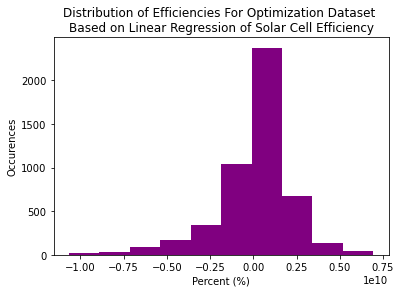

In [8]:
plt.hist(optimal, color='purple')
plt.title('Distribution of Efficiencies For Optimization Dataset \nBased on Linear Regression of Solar Cell Efficiency')
plt.xlabel('Percent (%)')
plt.ylabel('Occurences')
print('')

#### Graphing Results